# Projeto Rooney - Netflix

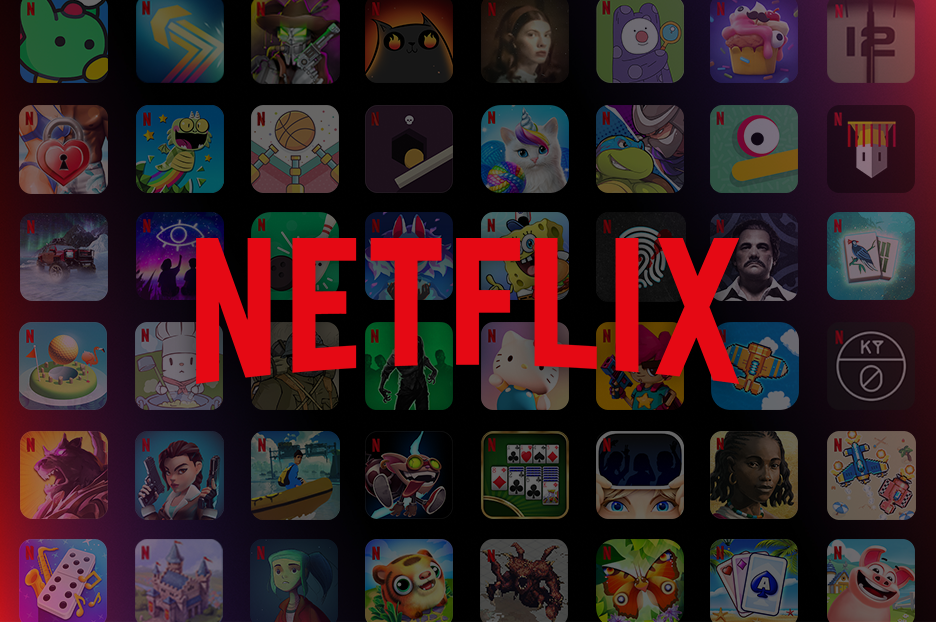

### Contexto do Negócio e Necessidade da Solução, com ênfase em Marketing:

A Netflix, como uma das principais plataformas de streaming do mundo, reconhece a importância do marketing como um componente crítico para seu sucesso contínuo. Com uma extensa biblioteca de conteúdo e uma base global de mais de 200 milhões de assinantes, o marketing desempenha um papel central na estratégia de negócios da Netflix.

Descrição de cada coluna no conjunto de dados:

* show_id: Um identificador único para cada programa ou filme.

* type: O tipo de conteúdo, seja "Filme" ou "Série de TV."

* title: O título do filme ou programa de TV.

* director: O diretor do filme ou programa de TV. Nas primeira e terceira entradas, essa informação não está disponível (NaN).

* cast: O elenco ou atores no filme ou programa de TV. Na primeira entrada, essa informação não está disponível (NaN). Na segunda entrada, há uma lista de atores da série de TV "Blood & Water".

* country: O país onde o filme ou programa de TV foi produzido ou está associado.

* date_added: A data em que o conteúdo foi adicionado à plataforma de streaming, no formato "Mês Dia, Ano."

* release_year: O ano em que o filme ou programa de TV foi originalmente lançado.

* rating: A classificação do conteúdo, que indica a idade recomendada da audiência ou nível de maturidade (por exemplo, "PG-13" ou "TV-MA").

* duration: A duração do filme ou programa de TV. Na primeira entrada, a duração é dada em minutos ("90 min"). Nas segunda e terceira entradas, é indicada o número de temporadas ("2 Temporadas" e "1 Temporada").

* listed_in: O gênero ou categoria do conteúdo, que pode ajudar a classificá-lo (por exemplo, "Documentários," "Programas de TV Internacionais," "Programas de TV de Crime").

* description: Uma breve descrição ou sinopse do filme ou programa de TV, fornecendo uma visão geral da trama ou do assunto.

### Importando as Bibliotecas Necessárias Para a Realização do Projeto

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.subplots as sp
import os
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv(r'C:\Users\Rafael 2\Desktop\netflix_titles.csv')

In [130]:
data.head(5) 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [131]:
data.shape      #Tamanho do nosso dataset

(8807, 12)

In [132]:
data.info()     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [133]:
data.type.unique()  #note that unique values in datatypes

array(['Movie', 'TV Show'], dtype=object)

In [134]:
data.isnull().sum()  

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### Quais são os diferentes tipos de streaming da Netflix neste conjunto de dados?

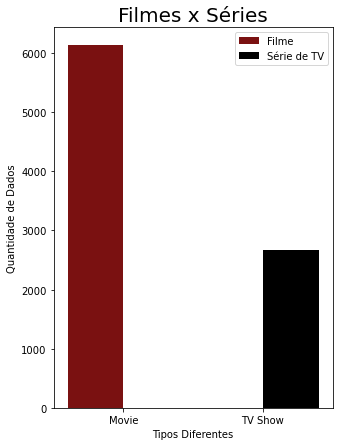

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

# Paleta de cores
colors = ["#8B0000", "#000000"]

plt.figure(figsize=(5, 7))
sns.set_palette(sns.color_palette(colors))  # Define a paleta de cores
sns.countplot(x='type', data=data, hue='type')
plt.title('Filmes x Séries', fontsize=20)
plt.xlabel('Tipos Diferentes', fontsize=10)
plt.ylabel('Quantidade de Dados', fontsize=10)
plt.legend(labels=['Filme', 'Série de TV'])
plt.show()


In [113]:
# Avaliando a integridade dos dados para identificar quais colunas possuem uma porcentagem significativa de valores nulos.
null_counts = data.isnull().sum()
total_rows = len(data)
null_percentage = (null_counts / total_rows) * 100
null_percentage_df = pd.DataFrame({'Column Name': null_percentage.index, 'Null Percentage': null_percentage.values})
null_percentage_df = null_percentage_df.sort_values(by='Null Percentage', ascending=False)
null_percentage_df.reset_index(drop=True, inplace=True)
print(null_percentage_df)

     Column Name  Null Percentage
0       director        29.908028
1        country         9.435676
2           cast         9.367549
3     date_added         0.113546
4         rating         0.045418
5       duration         0.034064
6        show_id         0.000000
7           type         0.000000
8          title         0.000000
9   release_year         0.000000
10     listed_in         0.000000
11   description         0.000000


Nosso dataset está com uma alta porcentagem de dados ausentes nas colunas "director", "country" e "cast". Isso pode impactar nossa análise que dependem dessas informações.

Imputação de Valores Ausentes no Conjunto de Dados da Netflix

Valores ausentes em colunas selecionadas do conjunto de dados da Netflix são imputados com o valor de espaço reservado "Desconhecido." As colunas escolhidas para a imputação incluem 'diretor,' 'país,' 'elenco,' 'classificação,' e 'duração.'

In [135]:
columns_to_impute = ['director', 'country', 'cast', 'rating', 'duration']
for column in columns_to_impute:
    data[column].fillna("Unknown", inplace=True)

In [115]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [136]:
data.type

0         Movie
1       TV Show
2       TV Show
3       TV Show
4       TV Show
         ...   
8802      Movie
8803    TV Show
8804      Movie
8805      Movie
8806      Movie
Name: type, Length: 8807, dtype: object

In [137]:
tv = data[data['type']== 'TV Show']
filme = data[data['type']== 'Movie']

In [138]:
filme_data = data[data['type'] == 'Movie']
filme_antigo = data[data['release_year'] == data['release_year'].min()]

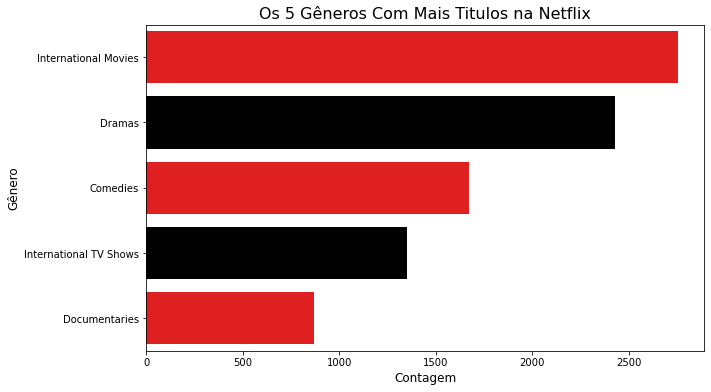

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

genre_counts = data['listed_in'].str.split(', ').explode().value_counts()
top_5_genres = genre_counts.head(5)

# Crie uma lista de cores alternadas
colors = ['#FF0000', '#000000'] * (len(top_5_genres) // 2) + ['#FF0000'] * (len(top_5_genres) % 2)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_genres.values, y=top_5_genres.index, palette=colors)
plt.title("Os 5 Gêneros Com Mais Titulos na Netflix", fontsize=16)
plt.xlabel("Contagem", fontsize=12)
plt.ylabel("Gênero", fontsize=12)
plt.show()


In [139]:
comedian_movies = data[data['listed_in'] == 'Comedies']

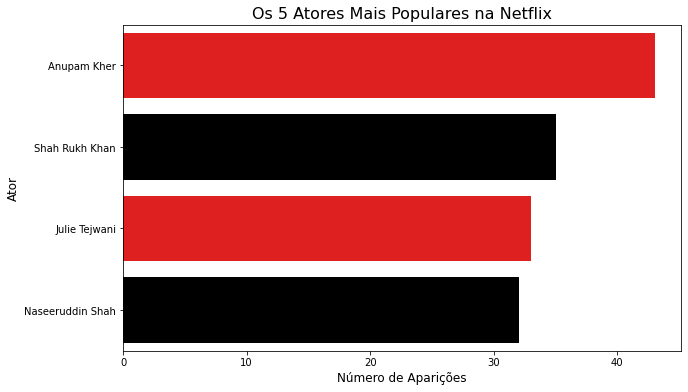

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

# Dados dos atores mais populares
top_5_cast = {
    "Anupam Kher": 43,
    "Shah Rukh Khan": 35,
    "Julie Tejwani": 33,
    "Naseeruddin Shah": 32,
}

# Lista de cores alternadas de vermelho (#FF0000) e preto (#000000)
colors = ["#FF0000", "#000000"] * (len(top_5_cast) // 2)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(top_5_cast.values()), y=list(top_5_cast.keys()), palette=colors)
plt.title("Os 5 Atores Mais Populares na Netflix", fontsize=16)
plt.xlabel("Número de Aparições", fontsize=12)
plt.ylabel("Ator", fontsize=12)
plt.show()


Os 5 Atores Mais Populares

No conjunto de dados, os 5 atores mais destacados são determinados com base no número de vezes em que aparecem no conteúdo da Netflix. Os atores mais proeminentes são:

- Anupam Kher, que possui 43 aparições.
- Shah Rukh Khan, com 35 aparições.
- Julie Tejwani, registrando 33 aparições.
- Naseeruddin Shah, com um total de 32 aparições.

Esses artistas têm uma presença notável nos títulos da Netflix, sendo Anupam Kher o mais prolífico, com 43 aparições. Isso reflete o fato de que eles desempenham um papel de destaque nas ofertas da plataforma de streaming e são figuras proeminentes no mundo do entretenimento proporcionado pela Netflix.

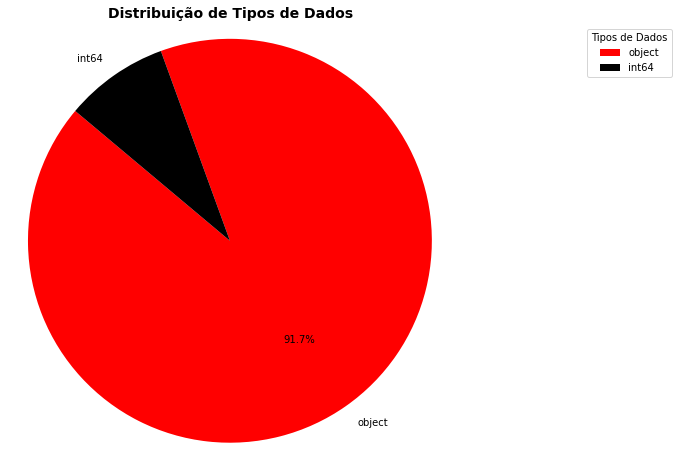

In [122]:
import matplotlib.pyplot as plt

# Cores personalizadas para as fatias do gráfico de pizza
cores = ['red', 'black']

# Contagens de tipos de dados
data_types_counts = data.dtypes.astype(str).value_counts()

# Crie um gráfico de pizza com as cores desejadas
plt.figure(figsize=(8, 8))
plt.pie(data_types_counts, labels=data_types_counts.index, autopct='%1.1f%%', colors=cores, startangle=140)
plt.title('Distribuição de Tipos de Dados', fontsize=14, fontweight='bold')
plt.axis('equal')  # Para manter uma aparência circular
plt.legend(title='Tipos de Dados', labels=data_types_counts.index, loc='upper right', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()


Distribuição de Tipos de Dados no Conjunto de Dados da Netflix

O código gera um gráfico de pizza para visualizar a distribuição de tipos de dados no conjunto de dados da Netflix. Especificamente, ele fornece informações sobre o número de colunas no conjunto de dados que pertencem a cada categoria de tipo de dados.

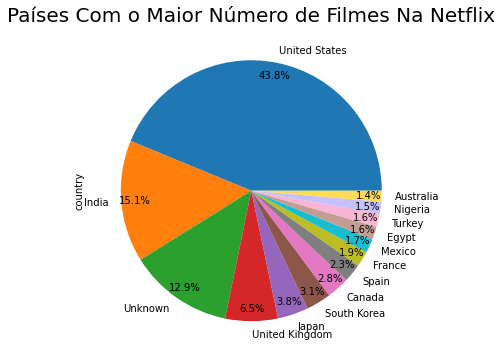

In [123]:
import matplotlib.pyplot as plt

# Defina uma lista de cores mais escuras e atraentes
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#c49c94', '#f7b6d2', '#c5c0ff', '#ffdb58']

plt.figure(figsize=(6, 6))
data['country'].value_counts()[:14].plot(kind='pie', autopct='%.1f%%', pctdistance=0.9, colors=colors)
plt.title('Países Com o Maior Número de Filmes Na Netflix', fontsize=20)
plt.show()


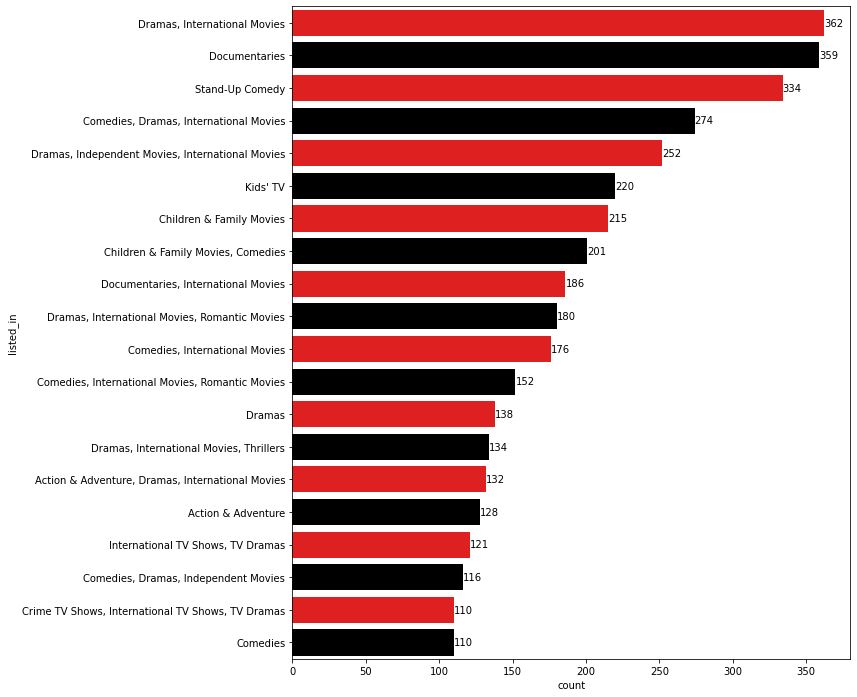

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponha que você já tenha um DataFrame chamado "data" com a coluna "listed_in".

# Defina uma paleta de cores personalizada com tons de vermelho e preto
colors = ["#FF0000", "#000000"]

plt.figure(figsize=(10, 12))
ax = sns.countplot(data=data, y="listed_in", order=data['listed_in'].value_counts().index[0:20], palette=colors)
ax.bar_label(ax.containers[0])
plt.show()


Análise das Categorias de Conteúdo da Netflix

Realiza uma análise das categorias de conteúdo dentro do conjunto de dados da Netflix. O objetivo é fornecer insights sobre a distribuição e popularidade de diferentes categorias de conteúdo.

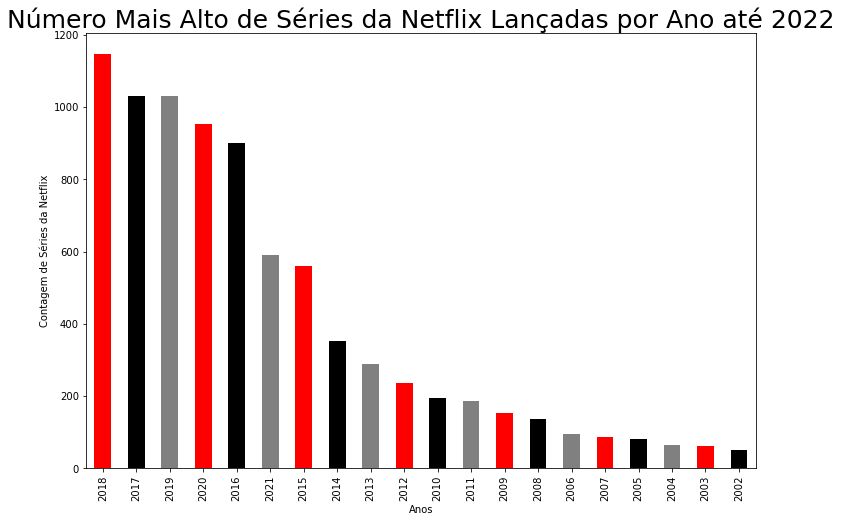

In [125]:
import matplotlib.pyplot as plt

# Filtrar os dados para incluir apenas os lançamentos até 2022
data_filtered = data[data['release_year'] <= 2022]

# Criar o gráfico com os dados filtrados
plt.figure(figsize=(12, 8))
data_filtered['release_year'].value_counts()[:20].plot(kind="bar", color=['red', 'black', 'gray',])
plt.title('Número Mais Alto de Séries da Netflix Lançadas por Ano até 2022', fontsize=25)
plt.xlabel('Anos', fontsize=10)
plt.ylabel('Contagem de Séries da Netflix', fontsize=10)
plt.show()


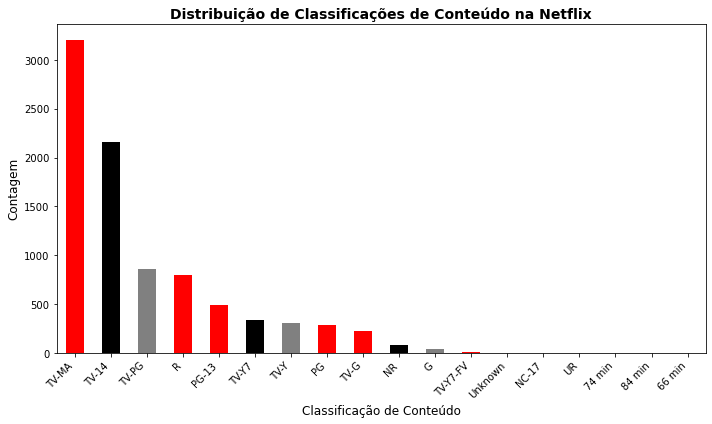

In [126]:
import matplotlib.pyplot as plt

# Cores personalizadas para as barras do gráfico de barras
cores = ['red', 'black', 'gray', 'red']

# Crie um gráfico de barras com cores diferentes
plt.figure(figsize=(10, 6))
rating_counts = data['rating'].value_counts()
rating_counts.plot(kind='bar', color=cores)
plt.title('Distribuição de Classificações de Conteúdo na Netflix', fontsize=14, fontweight='bold')
plt.xlabel('Classificação de Conteúdo', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotação dos rótulos no eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta o layout para garantir que todos os elementos se encaixem bem
plt.show()


In [127]:
import plotly.express as px

data = dict(
    number=[1063, 619, 135, 60, 44, 41, 40, 40, 38, 35],
    country=["United States", "India", "United Kingdom", "Canada", "Spain", 'Turkey', 'Philippines', 'France', 'South Korea', 'Australia']
)

fig = px.funnel(data, x='number', y='country')

fig.update_traces(marker=dict(color=['black', 'red', 'gray', 'black', 'red', 'gray', 'black', 'red', 'gray', 'black']))

fig.show()


## ------------------------------------------------------------------------------

### Features

In [140]:
int_col = data.select_dtypes(include=('int')).columns
str_col = data.select_dtypes(include=('object')).columns
flt_col = data.select_dtypes(include=('float')).columns

In [141]:
le = LabelEncoder()
for col in str_col:
    data[col] = le.fit_transform(data[col].astype('str'))
data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,0,1975,2295,7246,603,1711,2020,7,210,274,2577
1,1111,1,1091,4303,409,426,1706,2021,11,110,414,1762
2,2222,1,2651,2105,6296,736,1706,2021,11,0,242,7341
3,3333,1,3506,4303,7246,736,1706,2021,11,0,297,3617
4,4444,1,3861,4303,4815,251,1706,2021,11,110,393,4416


In [99]:
x = data.drop(['type'], axis='columns')
y = data[['type']]

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [101]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of the RandomForestClassifier on the test set: {accuracy}")

C:\Users\Rafael 2\AppData\Local\Temp\ipykernel_9148\4186661375.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy of the RandomForestClassifier on the test set: 0.9914869466515324


In [102]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Separar as variáveis numéricas das categóricas
numeric_cols = data.select_dtypes(include=['int', 'float']).columns
categorical_cols = data.select_dtypes(include=['int']).columns  # As colunas resultantes do LabelEncoder

# Aplicar a padronização (importante antes do PCA)
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Aplicar o PCA nas variáveis numéricas padronizadas
pca = PCA(n_components=3)  # Escolha o número de componentes desejado
principal_components = pca.fit_transform(data[numeric_cols])

# Crie um DataFrame com os componentes principais
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Agora, 'principal_df' contém os componentes principais resultantes do PCA


In [103]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [104]:
x = data.drop(['type'], axis='columns')
y = data[['type']]

In [105]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of the RandomForestClassifier on the test set: {accuracy}")

C:\Users\Rafael 2\AppData\Local\Temp\ipykernel_9148\4186661375.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy of the RandomForestClassifier on the test set: 0.9948921679909194


"Preparação de Dados de Treinamento e Teste para Classificação de Conteúdo da Netflix

A separação dos dados de características (X) da variável-alvo (Y) é um passo fundamental em tarefas de aprendizado de máquina e classificação. Isso permite o treinamento de modelos de classificação que preveem o tipo de conteúdo das entradas da Netflix com base nas características e atributos disponíveis."